# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

In [ ]:
df = pd.read_csv("car_data.csv")

In [ ]:
print(df.shape)
df.head()

(804, 12)


,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


## Tasks, Part 1

##Analyzing the Given Data
###Data Clean

In [ ]:
df_TP1 = df[['Price', 'Mileage']].copy()

In [ ]:
print(df_TP1.shape)
df_TP1.head()

(804, 2)


,Price,Mileage
0,17314.103129,8221
1,17542.036083,9135
2,16218.847862,13196
3,16336.913140,16342
4,16339.170324,19832


In [ ]:
df_TP1.dtypes

Price      float64
Mileage      int64
dtype: object

###Checking There is Any Null Data in Give Data Set

In [ ]:
df_TP1.isnull().sum()

Price      0
Mileage    0
dtype: int64

###Finding is There Any Dulicate Rows And Colunms Are Presented In Given Data Set

In [ ]:
df_TP1.duplicated().sum()

0

#Exploratory Data Analysis
###Finding Ouliers in Given Data Set By Two Way
>>1. Visualization of The Data Points In Boxplot
>>2. By Finding Interquartile Range $IQR$

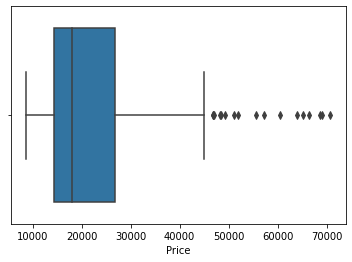

In [ ]:
sns.boxplot(x = df_TP1["Price"])

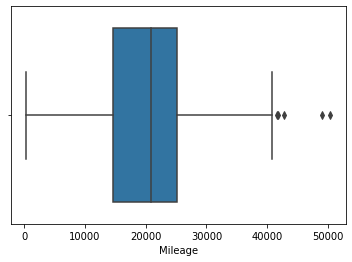

In [ ]:
sns.boxplot(x = df_TP1["Mileage"])

## IQR Method

In [ ]:
df_TP1.describe()

,Price,Mileage
count,804.000000,804.000000
mean,21343.143767,19831.934080
std,9884.852801,8196.319707
min,8638.930895,266.000000
25%,14273.073870,14623.500000
50%,18024.995019,20913.500000
75%,26717.316636,25213.000000
max,70755.466717,50387.000000


###Finding of Interquartile Range And Lower Limit And Upper Limit Method

In [ ]:
def outlier_presence(df_OUT):
  for i in df_OUT.keys():
    Q1 = df_OUT[i].quantile(0.25)
    Q3 = df_OUT[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print("Interquartile Range of " + i + " is", IQR)
    print("Lower Limit ", lower_limit)
    print("Upper Limit ", upper_limit)
    outliers = df_OUT[(df_OUT[i]<lower_limit)|(df_OUT[i]>upper_limit)]
    if outliers.shape[0] != 0:
      print("Outlier is Presented In",i )
      print("\n")
    else:
      print("Outlier is Not Presented In",i )
      print("\n")
  
outlier_presence(df_TP1)

Interquartile Range of Price is 12444.242765331575
Lower Limit  -4393.290277667038
Upper Limit  45383.68078365926
Outlier is Presented In Price


Interquartile Range of Mileage is 10589.5
Lower Limit  -1260.75
Upper Limit  41097.25
Outlier is Presented In Mileage




###From Above Box Plot And Finding of Interquartile Range We Can Know Outliers Present In Price And Mileage

###To Knowing Outlier Data Points In Our Feature And Target Variable 

In [ ]:
def Outlier_Data_Points(df_ODP):
  for i in df_ODP.keys():
    Q1 = df_ODP[i].quantile(0.25)
    Q3 = df_ODP[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    outliers = df_ODP[(df_ODP[i]<lower_limit)|(df_ODP[i]>upper_limit)] # Here We Find The All outliers In Given Data set
    if outliers.shape[0] != 0:
      print("Outlier is Presented In " + i + " is")
      for j in outliers[i]:
        print(j)
      print("\n")
    else:
      print("No Outlier is Presented In",i )

Outlier_Data_Points(df_TP1)

Outlier is Presented In Price is
51154.0472155256
49248.1589666802
46747.6732703394
48310.3295448604
48365.9808965303
70755.4667165429
68566.1871889452
69133.7317224283
66374.307040191
65281.4812369002
63913.117247728
60567.5490933118
57154.4434368902
55639.087653624
52001.9943785519
46732.6060296375
47065.2099128135


Outlier is Presented In Mileage is
41829
42691
41566
50387
48991




##Capping Outliers using the IQR method

In [ ]:
def Capping_Outlier(df_CO):
  for i in df_CO.keys():
    Q1 = df_CO[i].quantile(0.25)
    Q3 = df_CO[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    df_CO[i] = np.where(df_CO[i]<lower_limit, lower_limit, np.where(df_CO[i]>upper_limit, upper_limit, df_CO[i])) # Here We Replace The All outliers with whiskers(lower_limit and upper_limit)
    print("Outliers in " + i + " Are Capped Using Capping Method")
  return df_CO
df_TP1 = Capping_Outlier(df_TP1)

Outliers in Price Are Capped Using Capping Method
Outliers in Mileage Are Capped Using Capping Method


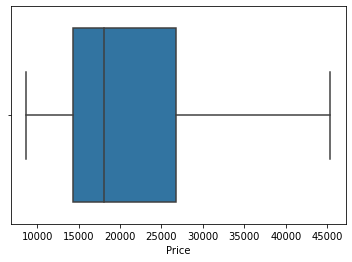

In [ ]:
sns.boxplot(x = df_TP1["Price"])

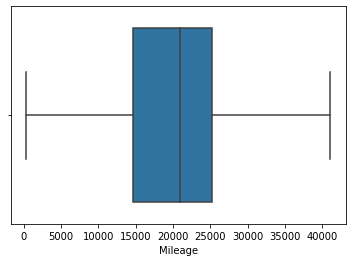

In [ ]:
sns.boxplot(x = df_TP1["Mileage"])

##Finding The Relationship Between The Mileage And Price

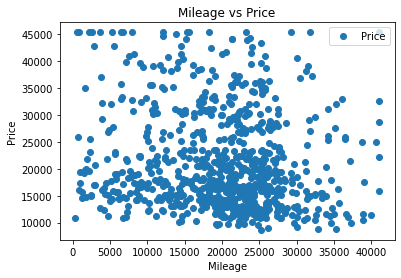

,Price,Mileage
Price,1.000000,-0.138997
Mileage,-0.138997,1.000000


In [ ]:
df_TP1.plot(x='Mileage', y='Price', style='o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

df_TP1.corr()

##1. Find the linear regression equation for mileage vs price.

###From Scatter Plot And Correlation Values We Can Find That There Is No Linear Relation Between Mileage and Price, So Developing Linear Regression Model for This Dataset is Useless.. However We Develop Linear Regression Model for This Dataset To Check $R^2$ And How Much it Worse.

In [ ]:
X = df_TP1.loc[:, ['Mileage']].values 
y = df_TP1.loc[:, 'Price'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

###Scaling The Data Set

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [ ]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(643, 1)
(161, 1)


##Developing The Model

In [ ]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()   
regressor.fit(X_train_scaled, y_train)

y_pred = regressor.predict(X_test_scaled) 
y_pred

array([22975.25950558, 21300.42138283, 20872.984122  , 22803.00866913,
       19717.37948773, 23775.37527368, 17466.90990458, 20638.53159461,
       20565.51992319, 20966.37526481, 23160.80130164, 18693.62117272,
       20931.81876984, 21631.98652172, 20793.06115159, 22714.04784619,
       22299.19269379, 24542.70667475, 24584.70610709, 19538.04013949,
       22550.30322388, 18838.58123879, 20716.85964987, 23646.89599752,
       22567.84729056, 23724.16077601, 21202.95434574, 21741.68124164,
       24610.22474953, 17466.90990458, 20937.66679207, 21044.88053286,
       21241.0550966 , 23499.80937791, 20855.79448091, 19119.2863056 ,
       21524.94999372, 20415.06626048, 20935.00860015, 22569.61941851,
       19920.99698885, 20434.91409349, 21000.0456958 , 20714.55588353,
       20817.69373005, 20637.82274343, 22202.25729508, 23375.58320882,
       18430.10574699, 19968.66723062, 22058.00608019, 21238.21969189,
       21720.59291907, 21398.77448389, 20941.21104796, 22467.72206155,
      

In [ ]:
New_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
New_df

,Actual,Predicted
0,25098.629057,22975.259506
1,16106.827221,21300.421383
2,12333.603993,20872.984122
3,17978.356998,22803.008669
4,11873.533995,19717.379488
...,...,...
156,18040.144006,22685.871012
157,11671.858127,20190.714862
158,27284.751328,22219.092511
159,14418.165291,21237.865266


##2. Chart the original data and the equation on the chart.

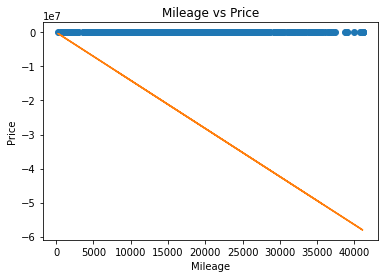

In [ ]:
y_pred = regressor.predict(X) 
plt.plot(X, y, 'o')
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.plot(X, y_pred)

##3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
from sklearn import metrics
y_pred = regressor.predict(X_test_scaled) 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: -0.011072739351832839


###$R^2$ Value Is Below The 0.8. Indicates This Linear Regression Model Is Worst For This Data Set

# Tasks, Part 2

##1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

##We Know There is No Linear Relationship Between Mileage And Price, So We Neglect Mileage In Our Data Set

In [ ]:
df_TP2 = df [['Price',	'Cylinder', 'Liter',	'Doors',	'Cruise',	'Sound', 'Leather']]

##Analyzing the Given Data
###Data Clean

In [ ]:
print(df_TP2.shape)
df_TP2.head()

(804, 7)


,Price,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,6,3.1,4,1,1,1
1,17542.036083,6,3.1,4,1,1,0
2,16218.847862,6,3.1,4,1,1,0
3,16336.913140,6,3.1,4,1,0,0
4,16339.170324,6,3.1,4,1,0,1


In [ ]:
df_TP2.dtypes

Price       float64
Cylinder      int64
Liter       float64
Doors         int64
Cruise        int64
Sound         int64
Leather       int64
dtype: object

In [ ]:
df_TP2.isnull().sum()

Price       0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [ ]:
df_TP2.duplicated().sum()

0

###There is No Duplicate Datas In Given Data Set, Now We Can Move Forward to Exploratory Data Analysis

#Exploratory Data Analysis
###Finding Ouliers in Given Data Set By Two Way
>>1. Visualization of The Data Points In Boxplot
>>2. By Finding Interquartile Range $IQR$

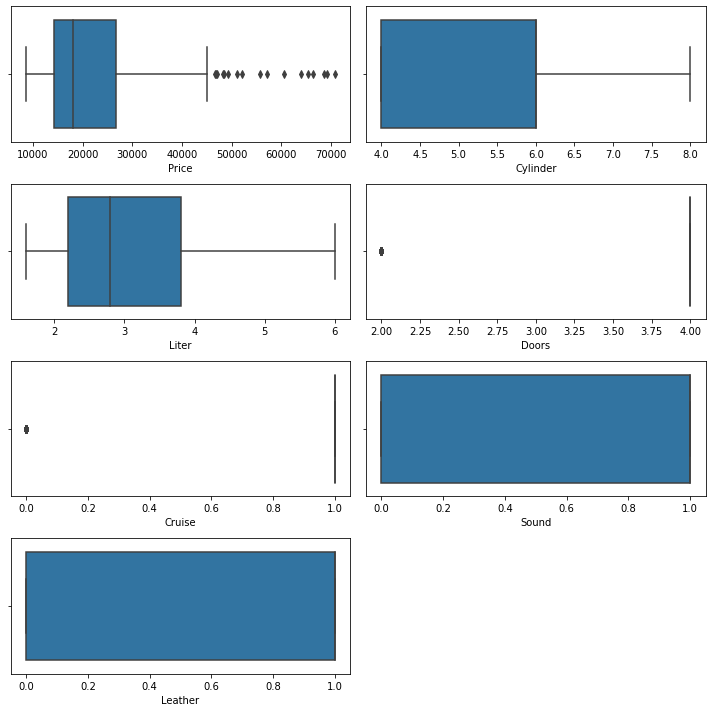

In [ ]:
import warnings                          # To Suppress Waring We Imported warnings
warnings.filterwarnings('ignore')           
feature = df_TP2.keys()                  # Here We Getting All Our Features
i = len(feature)
j = 6
plt.figure(figsize = (10, 10))
for k in feature:
  plt.subplot(4, 2, i-j)
  sns.boxplot(df_TP2[k])
  j-=1
plt.tight_layout()
plt.show()

In [ ]:
df_TP2['Doors'].value_counts()

4    614
2    190
Name: Doors, dtype: int64

In [ ]:
df_TP2['Cruise'].value_counts()

1    605
0    199
Name: Cruise, dtype: int64

In [ ]:
df_TP2['Sound'].value_counts()

1    546
0    258
Name: Sound, dtype: int64

In [ ]:
df_TP2['Leather'].value_counts()

1    582
0    222
Name: Leather, dtype: int64

###Doors, Cruise, Sound And Leather Are Categorical Variables

### IQR Method

In [ ]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


###Finding of Interquartile Range And Lower Limit And Upper Limit Method

###Already we written a function For Checking Outliers Presence in Data Set And To List Outliers Present in Data set And Capping The Outliers, So We Can Use That Function Detect And Remove Outliers

In [ ]:
outlier_presence(df_TP2)

Interquartile Range of Price is 12444.242765331575
Lower Limit  -4393.290277667038
Upper Limit  45383.68078365926
Outlier is Presented In Price


Interquartile Range of Cylinder is 2.0
Lower Limit  1.0
Upper Limit  9.0
Outlier is Not Presented In Cylinder


Interquartile Range of Liter is 1.5999999999999996
Lower Limit  -0.1999999999999993
Upper Limit  6.199999999999999
Outlier is Not Presented In Liter


Interquartile Range of Doors is 0.0
Lower Limit  4.0
Upper Limit  4.0
Outlier is Presented In Doors


Interquartile Range of Cruise is 0.0
Lower Limit  1.0
Upper Limit  1.0
Outlier is Presented In Cruise


Interquartile Range of Sound is 1.0
Lower Limit  -1.5
Upper Limit  2.5
Outlier is Not Presented In Sound


Interquartile Range of Leather is 1.0
Lower Limit  -1.5
Upper Limit  2.5
Outlier is Not Presented In Leather




In [ ]:
Outlier_Data_Points(df_TP2)

Outlier is Presented In Price is
51154.0472155256
49248.1589666802
46747.6732703394
48310.3295448604
48365.9808965303
70755.4667165429
68566.1871889452
69133.7317224283
66374.307040191
65281.4812369002
63913.117247728
60567.5490933118
57154.4434368902
55639.087653624
52001.9943785519
46732.6060296375
47065.2099128135


No Outlier is Presented In Cylinder
No Outlier is Presented In Liter
Outlier is Presented In Doors is
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


Outlier is Presented In Cruise is
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

###From Above Box Plot And Finding of Interquartile Range We Can Know Outliers Present In Price, Doors And Cruise. Here Door And Cruise Are Categorical Variables So No Need To Remove Outliers.

###Removing Outliers In Price Is Enough.

In [ ]:
Q1 = df_TP2['Price'].quantile(0.25)
Q3 = df_TP2['Price'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
df_TP2['Price'] = np.where(df_TP2['Price']<lower_limit, lower_limit, np.where(df_TP2['Price']>upper_limit, upper_limit, df_TP2['Price'])) # Here We Replace The All outliers with whiskers(lower_limit and upper_limit)
print("Outliers in Price Are Capped Using Capping Method")

Outliers in Price Are Capped Using Capping Method


In [ ]:
df_TP2.shape

(804, 7)

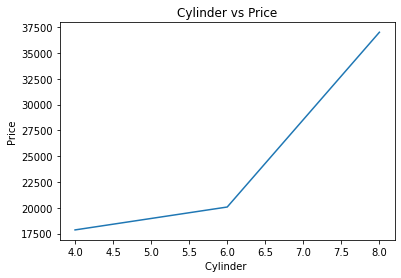

,Cylinder,Price
Cylinder,1.000000,0.569795
Price,0.569795,1.000000


In [ ]:
#df_TP2.shape.plot(x='Cylinder', y='Price', style='o')
df_TP2.groupby('Cylinder')['Price'].mean().plot()
plt.title('Cylinder vs Price')
plt.xlabel('Cylinder ')
plt.ylabel('Price')
plt.show()

df_TP2[['Cylinder', 'Price']].corr()

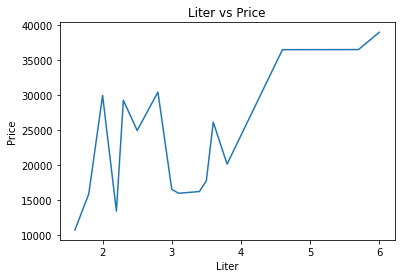

,Liter,Price
Liter,1.000000,0.570744
Price,0.570744,1.000000


In [ ]:
#df_TP2.plot(x='Liter', y='Price', style='o')
df_TP2.groupby('Liter')['Price'].mean().plot()
plt.title('Liter vs Price')
plt.xlabel('Liter')
plt.ylabel('Price')
plt.show()

df_TP2[['Liter', 'Price']].corr()

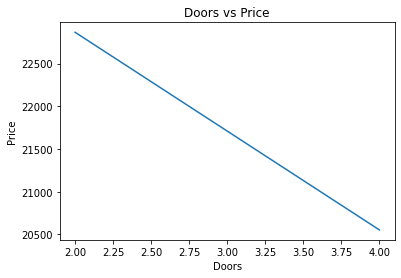

,Doors,Price
Doors,1.000000,-0.108917
Price,-0.108917,1.000000


In [ ]:
#df_TP2.plot(x='Doors', y='Price', style='o')
df_TP2.groupby('Doors')['Price'].mean().plot()
plt.title('Doors vs Price')
plt.xlabel('Doors')
plt.ylabel('Price')
plt.show()

df_TP2[['Doors', 'Price']].corr()

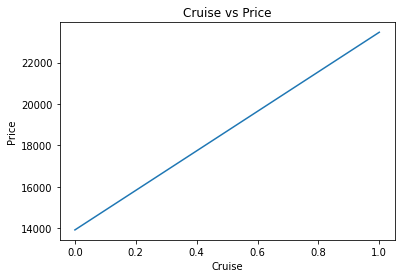

,Cruise,Price
Cruise,1.000000,0.456111
Price,0.456111,1.000000


In [ ]:
#df_TP2.plot(x='Cruise', y='Price', style='o')
df_TP2.groupby('Cruise')['Price'].mean().plot()
plt.title('Cruise vs Price')
plt.xlabel('Cruise')
plt.ylabel('Price')
plt.show()

df_TP2[['Cruise', 'Price']].corr()

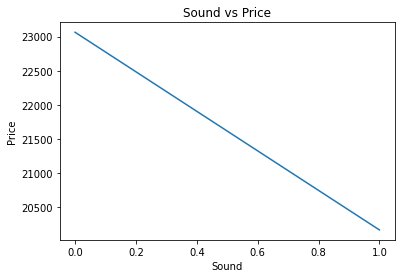

,Sound,Price
Sound,1.000000,-0.149583
Price,-0.149583,1.000000


In [ ]:
#df_TP2.plot(x='Sound', y='Price', style='o')
df_TP2.groupby('Sound')['Price'].mean().plot()
plt.title('Sound vs Price')
plt.xlabel('Sound')
plt.ylabel('Price')
plt.show()

df_TP2[['Sound', 'Price']].corr()

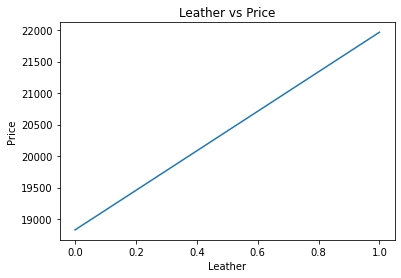

,Leather,Price
Leather,1.000000,0.155412
Price,0.155412,1.000000


In [ ]:
#df_TP2.plot(x='Leather', y='Price', style='o')
df_TP2.groupby('Leather')['Price'].mean().plot()
plt.title('Leather vs Price')
plt.xlabel('Leather')
plt.ylabel('Price')
plt.show()

df_TP2[['Leather', 'Price']].corr()

###From Scatter Plot And Correlation Values We Can Find That There Is Good Linear Relation Between (Mileage, Cylinder, Liter, Doors, Cruise, Sound, Leather) And Price, For Categorical Variable Correlation Values Doesn't Have Any Sense Here, So We Can Develop Linear Regression Model

##Spliting The Data Set In Train And Test For Developing Models

In [ ]:
X = df_TP2.loc[:, ['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']].values 
y = df_TP2.loc[:, 'Price'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

##Scaling The Data Set

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

##Developing The Model

In [ ]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()   
regressor.fit(X_train_scaled, y_train)

y_pred = regressor.predict(X_test_scaled) 
y_pred

array([21427.1661206 , 17796.40510006, 12073.11914181, 23099.16282218,
       12073.11914181, 32112.89725179, 31255.57064165, 20650.05519739,
       27313.9142582 , 33018.78219156, 33018.78219156, 15368.74630566,
       21633.32548966, 12600.77496206, 15368.74630566, 18827.83564886,
       29433.35109312, 14422.9945106 , 18029.47636633, 18827.83564886,
       15280.32112074, 24634.36809953, 15620.63366993, 14422.9945106 ,
       26936.08321179, 18827.83564886, 18953.77933099, 18953.77933099,
       32112.89725179, 20398.16783312, 21427.1661206 , 21633.32548966,
       24382.48073526, 35698.32835023, 24106.71227927, 21633.32548966,
       27313.9142582 , 18029.47636633, 12600.77496206, 18324.06092031,
       20650.05519739, 17442.85321846, 18575.94828459, 14422.9945106 ,
       18048.29246433, 18953.77933099, 13895.33869034, 23626.81864244,
       23099.16282218, 21427.1661206 , 18029.47636633, 18827.83564886,
       23374.93127817, 18827.83564886, 18827.83564886, 18300.1798286 ,
      

In [ ]:
New_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
New_df

,Actual,Predicted
0,25098.629057,21427.166121
1,16106.827221,17796.405100
2,12333.603993,12073.119142
3,17978.356998,23099.162822
4,11873.533995,12073.119142
...,...,...
156,18040.144006,29136.133807
157,11671.858127,18827.835649
158,27284.751328,18575.948285
159,14418.165291,12600.774962


In [ ]:
df_coff = pd.DataFrame(regressor.coef_ , ['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'], columns= ['Cofficient'])
df_coff

,Cofficient
Cylinder,2631.413945
Liter,1410.557510
Doors,-775.949547
Cruise,2645.663863
Sound,-1240.415347
Leather,1429.980491


In [ ]:
print(regressor.intercept_) 

21248.695503603118


##2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.43560037860291867


###$R^2$ Value Is Below The 0.8. Indicates This Linear Regression Model Is Decent Fit For This Data Set

##3. Find the combination of the factors that is the best predictor for price.

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train_scaled, y_train)
print(list(zip(['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],sfs.get_support())))

[('Cylinder', False), ('Liter', True), ('Doors', False), ('Cruise', True), ('Sound', False), ('Leather', False)]


## Tasks, Hard Mode

###1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.

In [ ]:
df_THM = df[['Price','Make','Model','Trim']]

In [ ]:
df_THM.shape

(804, 4)

In [ ]:
df_THM

,Price,Make,Model,Trim
0,17314.103129,Buick,Century,Sedan 4D
1,17542.036083,Buick,Century,Sedan 4D
2,16218.847862,Buick,Century,Sedan 4D
3,16336.913140,Buick,Century,Sedan 4D
4,16339.170324,Buick,Century,Sedan 4D
...,...,...,...,...
799,16507.070267,Saturn,L Series,L300 Sedan 4D
800,16175.957604,Saturn,L Series,L300 Sedan 4D
801,15731.132897,Saturn,L Series,L300 Sedan 4D
802,15118.893228,Saturn,L Series,L300 Sedan 4D


In [ ]:
df_THM = pd.get_dummies(df_THM, columns=['Make','Model','Trim'])

In [ ]:
df_THM.shape

(804, 86)

In [ ]:
df_THM

,Price,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,...,Trim_Quad Coupe 2D,Trim_SE Sedan 4D,Trim_SLE Sedan 4D,Trim_SS Coupe 2D,Trim_SS Sedan 4D,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D
0,17314.103129,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,17542.036083,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,16218.847862,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,16336.913140,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,16339.170324,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
800,16175.957604,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
801,15731.132897,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
802,15118.893228,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Spliting The Data Set In Train And Test For Developing Models

In [ ]:
X = df_THM.iloc[:, 1:].values 
y = df_THM.loc[:, 'Price'].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

In [ ]:
y_test.shape

(161,)

##Developing The Model

In [ ]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()   
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test) 
y_pred

array([22144., 15744., 13200., 16992., 13200., 37120., 64064., 12944.,
       20992., 36000., 36000., 30608., 29360., 13536., 30608., 13136.,
       42880., 13568., 16864., 12368., 13200., 17264., 13200., 14096.,
       20080., 15104., 30592., 30592., 42880., 36176., 18016., 29360.,
       19168., 36000., 16352., 30592., 18016., 17888., 14464., 15040.,
       13568., 14800., 25904., 12400., 30608., 27472., 14800., 16992.,
       16992., 18016., 17888., 12368., 31072., 13136., 12368., 13200.,
       18016., 13200., 13200., 33920., 42880., 19664., 11376., 38272.,
       42880., 19168., 22144., 29360., 16864., 16000., 11776., 30608.,
       32256., 19664., 11776., 17232., 29360., 15936., 22992., 12400.,
       11776., 11216., 20576., 16992., 11744., 21648., 16000., 33920.,
       12944., 17232., 17392., 12128., 11744., 21648., 29360., 19664.,
       33024., 14800., 15936., 14800., 16864., 22144., 31072., 22992.,
       13536., 13424., 22144., 16352., 20576., 15520., 26016., 16352.,
      

In [ ]:
New_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
New_df

,Actual,Predicted
0,25098.629057,22144.0
1,16106.827221,15744.0
2,12333.603993,13200.0
3,17978.356998,16992.0
4,11873.533995,13200.0
...,...,...
156,18040.144006,17232.0
157,11671.858127,12368.0
158,27284.751328,25904.0
159,14418.165291,14464.0


In [ ]:
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9483165055228516


$R^2$ Value is 0.9, It's Very Good Value

##2. Find the best combination of factors to predict price.

In [ ]:
KEY = []
for i in df_THM.keys():
  if i!='Price':
    KEY.append(i)

In [ ]:
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=5)
sfs.fit(X_train, y_train)
print(list(zip([KEY],sfs.get_support())))

[(['Make_Buick', 'Make_Cadillac', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Saturn', 'Model_9-2X AWD', 'Model_9_3', 'Model_9_3 HO', 'Model_9_5', 'Model_9_5 HO', 'Model_AVEO', 'Model_Bonneville', 'Model_CST-V', 'Model_CTS', 'Model_Cavalier', 'Model_Century', 'Model_Classic', 'Model_Cobalt', 'Model_Corvette', 'Model_Deville', 'Model_G6', 'Model_GTO', 'Model_Grand Am', 'Model_Grand Prix', 'Model_Impala', 'Model_Ion', 'Model_L Series', 'Model_Lacrosse', 'Model_Lesabre', 'Model_Malibu', 'Model_Monte Carlo', 'Model_Park Avenue', 'Model_STS-V6', 'Model_STS-V8', 'Model_Sunfire', 'Model_Vibe', 'Model_XLR-V8', 'Trim_AWD Sportwagon 4D', 'Trim_Aero Conv 2D', 'Trim_Aero Sedan 4D', 'Trim_Aero Wagon 4D', 'Trim_Arc Conv 2D', 'Trim_Arc Sedan 4D', 'Trim_Arc Wagon 4D', 'Trim_CX Sedan 4D', 'Trim_CXL Sedan 4D', 'Trim_CXS Sedan 4D', 'Trim_Conv 2D', 'Trim_Coupe 2D', 'Trim_Custom Sedan 4D', 'Trim_DHS Sedan 4D', 'Trim_DTS Sedan 4D', 'Trim_GT Coupe 2D', 'Trim_GT Sedan 4D', 'Trim_GT Sportwagon', 'Trim